Salida de la red: -0.4060
Gradiente en x1: -0.4066
Gradiente en x2: 0.1204


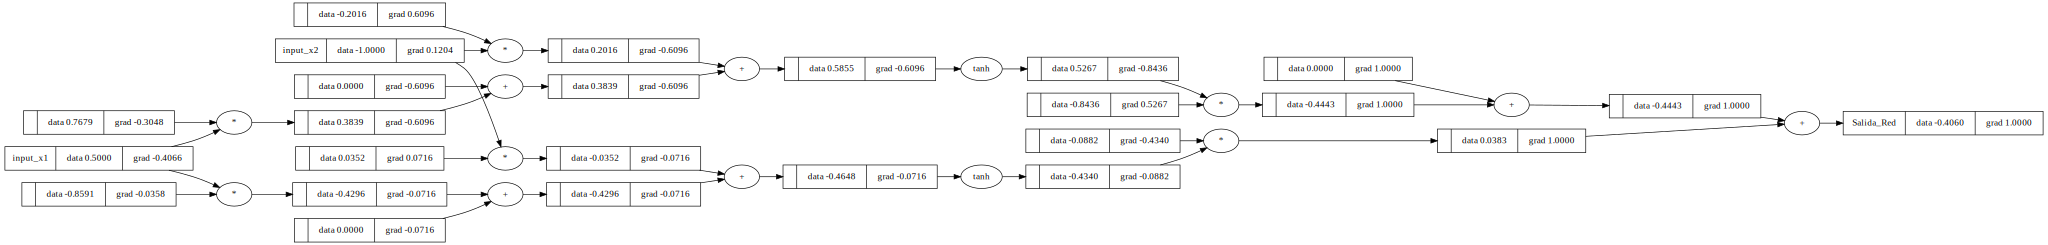

In [4]:
from michigrad.engine import Value
from michigrad.nn import MLP, Tanh, Sigmoid # Importamos las nuevas clases
from michigrad.visualize import show_graph, show_graph_interactive  # , show_graph_interactive
# Asegúrate de tener cargada/importada tu función show_graph aquí

# 1. Configuración: Creamos una red pequeña (2 entradas -> 2 ocultas -> 1 salida)
#    Aquí probamos tu refactorización: le pasamos explícitamente la activación Tanh.
model = MLP(2, [2, 1], act_fn=Tanh)

# 2. Definimos entradas con nombres (para que el gráfico se entienda)
x1 = Value(0.5, name='input_x1')
x2 = Value(-1.0, name='input_x2')
inputs = [x1, x2]

# 3. Forward Pass (Pasada hacia adelante)
#    Esto pasará por Linear -> Tanh -> Linear -> Tanh (o Linear final)
out = model(inputs)
out.name = 'Salida_Red'

# 4. Backward Pass
#    Calculamos gradientes. Si tu derivada de Tanh está mal, aquí daría error.
model.zero_grad()
out.backward()

# 5. Visualización
print(f"Salida de la red: {out.data:.4f}")
print(f"Gradiente en x1: {x1.grad:.4f}")
print(f"Gradiente en x2: {x2.grad:.4f}")

# Generamos el gráfico estático (Graphviz)
# Deberías ver nodos ovalados que dicen "Tanh" en el grafo
# Generar el grafo
dot = show_graph(out)

# Guardar el archivo por si acaso, pero SIN intentar abrirlo (view=False)
dot.render('red_tanh_test', view=False, format='png')

# Mostrar el gráfico aquí mismo en el notebook
dot